# Content and Objective

+ Show result of "taxi problem":
    + Given $\Omega=\{1,...,K\}$ 
    + Observe $K$ samples $X_1=x_1, ..., X_N=x_N$ (assumed to be different)
    + Estimate for $K$ based on the samples: $$\hat{K}=S(x_1,...,x_N)$$
    
+ Method: Sample groups and get estimator

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 15) )

# Parameters

In [3]:
# define (unknown) group size
K = 1000 #np.random.randint( 1000 )

taxis = [ t for t in range( K ) ]

# size of subgroup to be observed
M = K // 10

# number of observations
N = int( 100 )

# number of trials for estimation expection of the estimator
# NOTE: not relativ to observation length
N_trials = int( 1e2 )

# Simulations

In [4]:
# sample random values
# Note: 2-dim arrays are sampled in which
#       first dimension describes N realizations used for determining the estimator
#       second dimension realizes N_trials used for averaging w.r.t. different estimation outcomes

X_samples = np.random.choice( taxis, size = ( N, N_trials), replace = 1 )

# determine max w.r.t. to first dimension = axis 0 
X_max = np.max( X_samples, axis=0 )
    

### Show histogram of estimations

Text(0.5, 1.0, 'Histogram of estimated values')

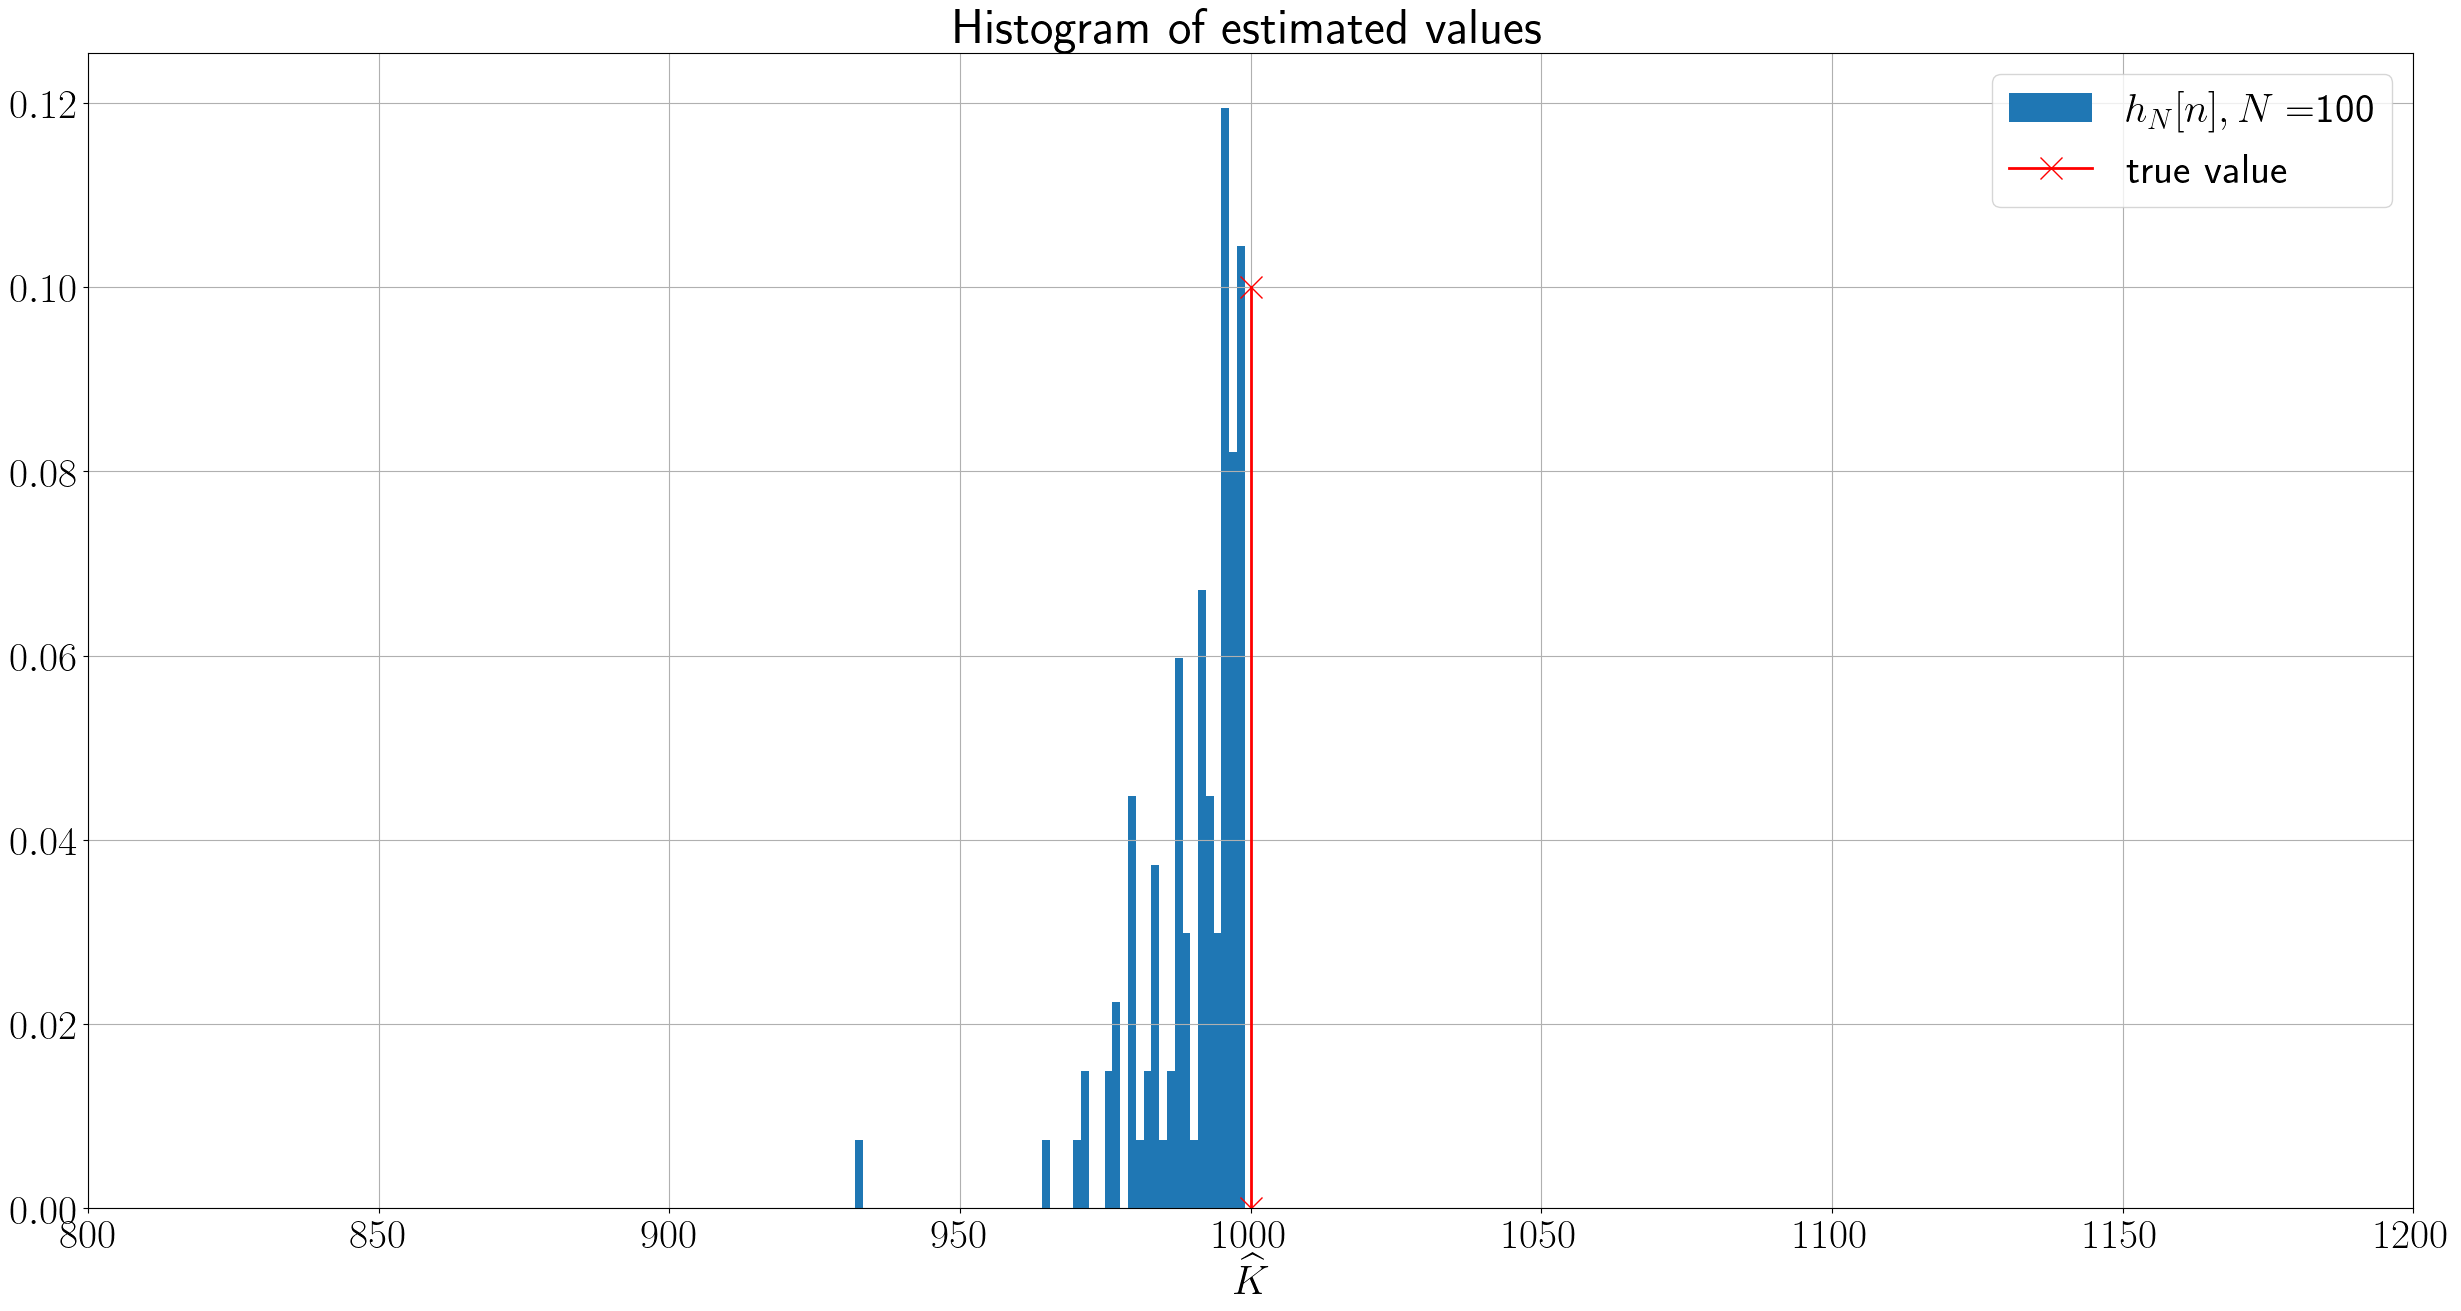

In [5]:
plt.hist( X_max, bins=50, density=1, label='$h_{N}[n], N=$'+str(N) )
plt.plot( [ K, K], [0, .1 ], '-x', color='red', ms=16, linewidth=2.0, label='true value')

plt.xlim( ( 0.8 * K , 1.2 * K ) )
plt.xlabel('$\widehat{K}$')
plt.grid( 1 )
plt.legend( )
plt.title('Histogram of estimated values')

### Check if estimator is unbiased

In [6]:
# get sample average and compare to true value
E_T = np.average( X_max )
V_T = np.var( X_max )

print(' True value for K: \t\t{}'.format( K ) )
print(' Average of estimators: \t{}'.format( E_T  ) )
print(' Variance of estimators: \t{:2.7f}'.format( V_T ) )

 True value for K: 		1000
 Average of estimators: 	989.74
 Variance of estimators: 	94.2924000


### Show Results for Additional Estimators

+ Additional esimators
    + $\hat{K}=\max\{x_1,...,x_N\}+\min\{x_1,...,x_N\}$
    + $\hat{K}=2\cdot \frac{1}{N}( x_1+ \cdots+ x_N)$


In [7]:
# initialize array for collecting several estimations to evaluate bias of estimator
X_samples = np.random.choice( taxis, size = ( N, N_trials), replace = 1 )

# improvement 1: add min + max
X_min = np.min( X_samples, axis=0 )
X_max = np.max( X_samples, axis=0 )
X_improved_1 = X_min + X_max

# improvement 2: 2 * average
X_average = np.average( X_samples, axis=0 )
X_improved_2 = 2 * X_average

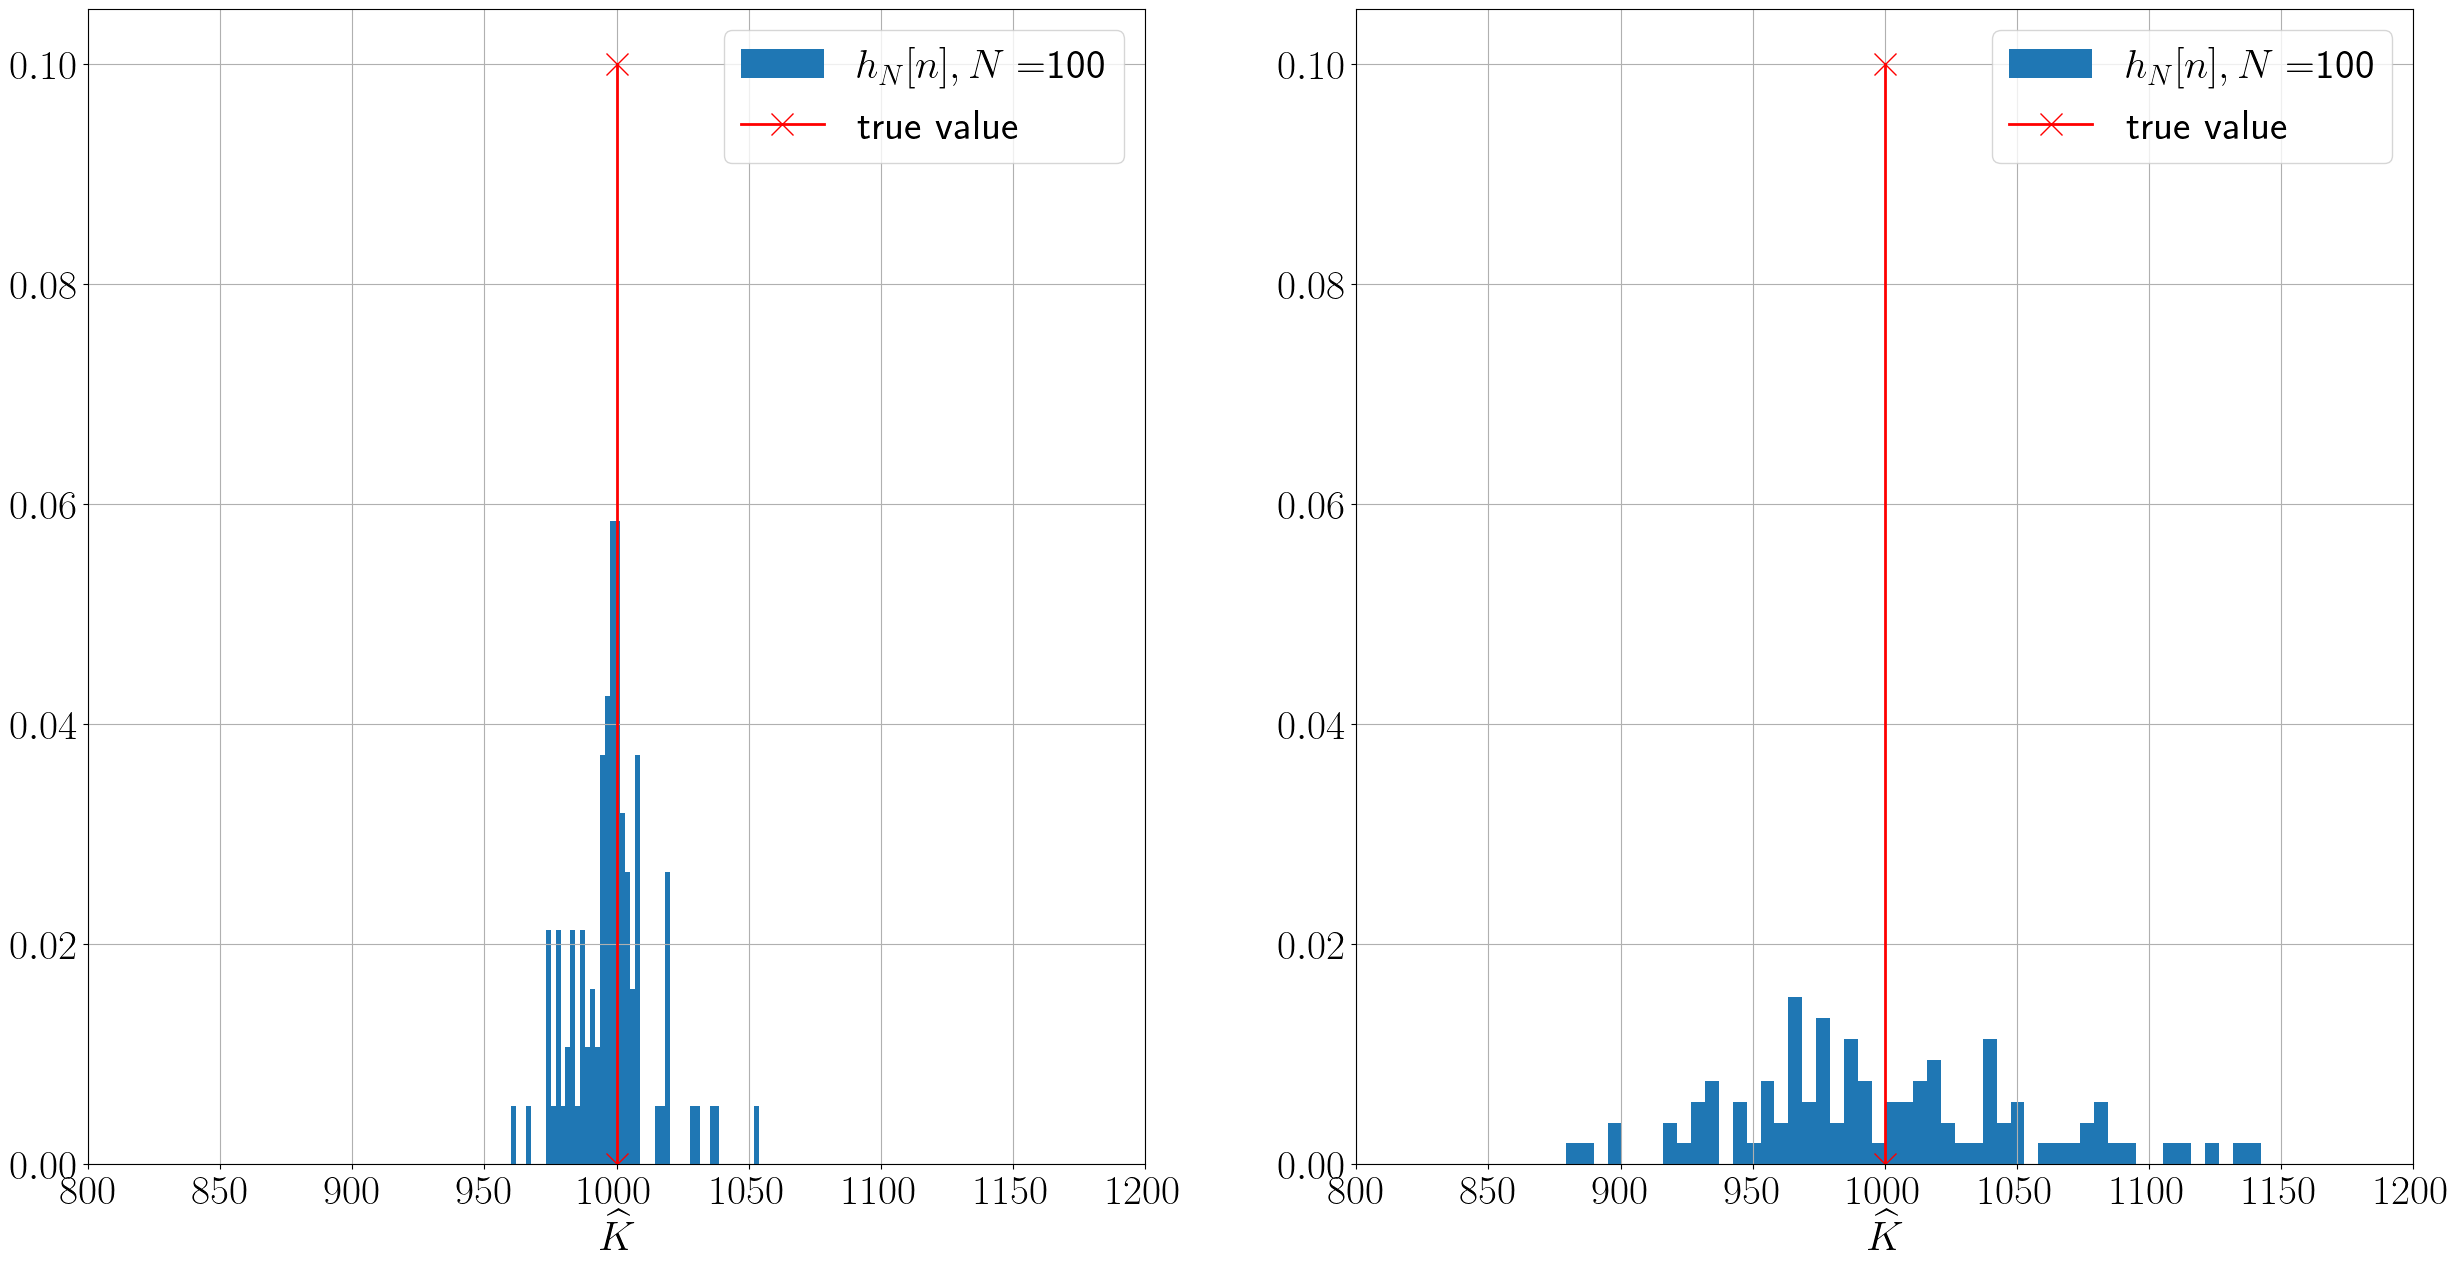

In [8]:
plt.figure()

plt.subplot(121)
plt.hist( X_improved_1, bins=50, density=1, label='$h_{N}[n], N=$'+str(N) )
plt.plot( [ K, K], [0, .1 ], '-x', color='red', ms=16, linewidth=2.0, label='true value')

plt.xlim( ( 0.8 * K , 1.2 * K ) )
plt.xlabel('$\widehat{K}$')
plt.grid( 1 )
plt.legend( )

plt.subplot(122)
plt.hist( X_improved_2, bins=50, density=1, label='$h_{N}[n], N=$'+str(N) )
plt.plot( [ K, K], [0, .1 ], '-x', color='red', ms=16, linewidth=2.0, label='true value')

plt.xlim( ( 0.8 * K , 1.2 * K ) )
plt.xlabel('$\widehat{K}$')
plt.grid( 1 )
plt.legend( )

### Check if improved estimators are unbiased

In [9]:
# get sample average and compare to true value
E_T_1 = np.average( X_improved_1 )
E_T_2 = np.average( X_improved_2 )

V_T_1 = np.var( X_improved_1 )
V_T_2 = np.var( X_improved_2 )


print(' True value for K: \t\t\t{}\n'.format( K ) )
print(' Average of improved estimators 1: \t{}'.format( E_T_1  ) )
print(' Variance of improved estimators 1: \t{}\n'.format( V_T_1  ) )

print(' Average of improved estimators 2: \t{}'.format( E_T_2  ) )
print(' Variance of improved estimators 2: \t{}\n'.format( V_T_2  ) )

 True value for K: 			1000

 Average of improved estimators 1: 	998.16
 Variance of improved estimators 1: 	221.89440000000002

 Average of improved estimators 2: 	998.8717999999999
 Variance of improved estimators 2: 	3054.241712760001

